# PLOT 2-D COUNTOUR MAP USING CARTOPY



### データ処理、分析、および可視化のためのライブラリのインポート

データの読み込み、分析、および可視化、特に地理データに必要なライブラリをインポートします。

- **`xarray`**：多次元配列およびデータセットを扱うために使用され、特にnetCDFファイルで一般的に使用されます。複雑な構造の大規模データセットの効率的な処理と分析を可能にします。
  
- **`pandas`**：強力なデータ操作ライブラリで、DataFrame構造を用いて表形式のデータを処理するのに適しています。

- **`numpy`**：Pythonの基本的な数値計算ライブラリで、配列操作や数値計算に使用されます。

- **`matplotlib.pyplot`**：Pythonの主要なプロットライブラリで、静的、アニメーション、およびインタラクティブな可視化を作成するために使用されます。

- **`cartopy.crs`**：地図投影のツールを提供し、異なる地理座標系でデータを可視化することを可能にします。

- **`cartopy.feature`**：海岸線、国境、陸地の色付けなどの要素を地理地図に追加し、可視化におけるコンテキスト情報を強化します。

---
### Importing Libraries for Data Handling, Analysis, and Geographic Visualization

This section imports essential libraries required for loading, analyzing, and visualizing data, especially geospatial data.

- **`xarray`**: Used for working with multi-dimensional arrays and datasets, commonly applied to netCDF files. It enables efficient handling and analysis of large datasets with complex structures.
  
- **`pandas`**: A powerful data manipulation library, especially suited for handling tabular data with its DataFrame structure.

- **`numpy`**: A core numerical library in Python, used here for array operations and numerical calculations.

- **`matplotlib.pyplot`**: The primary plotting library in Python, used for creating static, animated, and interactive visualizations.

- **`cartopy.crs`**: Provides tools for map projections, which allow data to be visualized on different geographic coordinate systems.

- **`cartopy.feature`**: Adds elements like coastlines, borders, and land shading to geographic maps, enhancing the contextual information within the visualizations.


In [61]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

### xarrayでnetCDFデータセットを開く

`SST_2010_data.nc` という名前のnetCDFファイルを `xarray` を使用して開きます。

- `xr.open_dataset()` はnetCDFファイルを読み込み、xarrayの `Dataset` に格納します。
- このデータセットには、2010年の海面水温（SST）の地理的および時間的なデータが、多次元配列形式で含ます。

----
### Opening a netCDF Dataset with xarray

This line opens a netCDF file named `SST_2010_data.nc` using `xarray`. 

- `xr.open_dataset()` reads the netCDF file and loads it into an xarray `Dataset`, which allows for efficient data manipulation and analysis.
- This dataset likely contains geospatial and temporal data for Sea Surface Temperature (SST) in 2010, organized in a multi-dimensional array format.


In [62]:
ds = xr.open_dataset('SST_2010_data.nc')
ds

<xarray.Dataset> Size: 16MB
Dimensions:  (lat: 99, lon: 109, time: 365)
Coordinates:
    lat2d    (lat, lon) float32 43kB ...
    lon2d    (lat, lon) float32 43kB ...
  * time     (time) datetime64[ns] 3kB 2010-01-01 2010-01-02 ... 2010-12-31
Dimensions without coordinates: lat, lon
Data variables:
    PMSL     (time, lat, lon) float32 16MB ...

# USING XARRAY FOR QUICK PLOT

### PMSLの特定の時間スライスを抽出してプロットする

データセット内の `PMSL`（平均海面気圧）変数から特定の時間スライスを抽出し、それをプロットします。

- `ds.PMSL[0]` は `PMSL` データの1番目の時間スライスを選択します（インデックスは0から始まります）。このスライスは特定の時点を表します。
- `data.plot()` は選択した時間スライスのプロットを作成し、その時点でのPMSL値の空間分布を視覚化します。
----

### Extracting and Plotting a Specific Time Slice of PMSL

This code extracts a specific time slice from the `PMSL` (Pressure at Mean Sea Level) variable within the dataset and plots it.

- `ds.PMSL[0]` selects the second time slice of `PMSL` data, as indexing starts from zero. This slice represents a single point in time.
- `data.plot()` creates a plot of the selected time slice, allowing us to visualize the spatial distribution of PMSL values at that time.


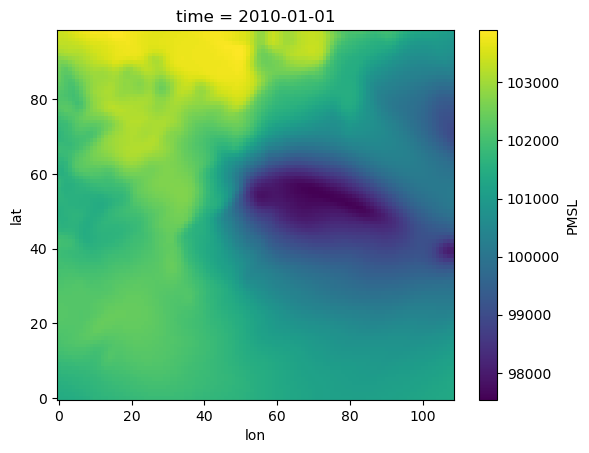

In [63]:
data = ds.PMSL[0]
data.plot()

# PLOT USING MATPLOTLIB.PYPLOT

### 緯度と経度のグリッドの準備とPMSLデータのhPaへの変換

地理座標グリッドを準備し、可視化のために気圧データを変換します。

- **緯度と経度のグリッド**：`data.lon2d` と `data.lat2d` は、それぞれ経度と緯度の2次元グリッドを作成します。
- **気圧データのhPa変換**：`pressure_data = data / 100` はPMSLの1番目の時間スライス、100で割ってPaから標準単位のhPa（ヘクトパスカル）に変換します。

---

### Preparing Latitude and Longitude Grids and Converting PMSL Data to hPa

Prepares geographic coordinate grids and converts pressure data for visualization.

- **Latitude and Longitude Grids**: `data.lon2d` and `data.lat2d` create two-dimensional grids of longitude and latitude values, respectively.
- **Pressure Data in hPa**: `pressure_data = data / 100` is the first time slice of PMSL and divides by 100 to convert from Pa to hPa (hectopascals), a standard unit for atmospheric pressure.





In [64]:
lon_grid, lat_grid = data.lon2d, data.lat2d
pressure_data = data / 100

### 気圧データを塗りつぶし等高線でプロットする 

`pressure_data` を `lon_grid` と `lat_grid` を経度および緯度のグリッドとして使用して塗りつぶし等高線プロットを作成します。

- **`plt.contourf()`**：この関数は塗りつぶし等高線を生成し、気圧のようなデータセットの空間分布を視覚化します。
- **グリッドとデータ**：`lon_grid` と `lat_grid` はそれぞれ x 軸（経度）と y 軸（緯度）を表し、`pressure_data` は z 軸（hPa 単位の気圧値）を表します。

---

### Plotting Pressure Data with Filled Contours

This line of code creates a filled contour plot of the `pressure_data` using `lon_grid` and `lat_grid` as the longitude and latitude grids, respectively.

- **`plt.contourf()`**: This function generates filled contours, which are useful for visualizing spatial distributions in a dataset like pressure. 
- **Grids and Data**: `lon_grid` and `lat_grid` represent the x and y axes (longitude and latitude), while `pressure_data` is the z-axis (pressure values in hPa).
  


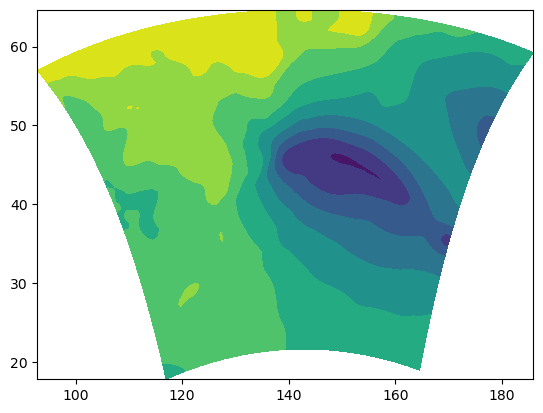

In [65]:
# Create a filled contour plot of pressure data using longitude and latitude grids
# 経度と緯度のグリッドを使用して、気圧データの塗りつぶし等高線プロットを作成します
plt.contourf(lon_grid, lat_grid, pressure_data)

# PLOT USING CARTOPY

### メルカトル図法を使用して気圧データをプロットする

メルカトル図法を使用して地図上に気圧データをプロットします。特定の図法と色の設定を行い、データの空間分布を視覚化します。

- **`fig = plt.figure(figsize=(10, 8))`**：プロットサイズを指定して図を作成します。
- **`projection = ccrs.Mercator(central_longitude=180)`**：中心経度180度でメルカトル図法を定義し、太平洋を中央にしたプロジェクションを提供します。
- **`ax = plt.axes(projection=projection)`**：指定された投影を使用して軸を作成します。
- **`ax.contourf()`**：指定された `cmap="coolwarm"` を使用して、塗りつぶし等高線プロットを作成し、データの分布を色で表現します。`transform=ccrs.PlateCarree()` を使用して、経度と緯度が適切にマッピングされるように調整します。

---
### Plotting Pressure Data with Mercator Projection

This code plots pressure data on a map using the Mercator projection. It specifies a particular map projection and color scheme to visualize the spatial distribution of the data.

- **`fig = plt.figure(figsize=(10, 8))`**: Sets up the figure with a specified size for the plot.
- **`projection = ccrs.Mercator(central_longitude=180)`**: Defines the Mercator projection with a central longitude of 180°, centering the Pacific region in the projection.
- **`ax = plt.axes(projection=projection)`**: Creates an axis with the specified projection.
- **`ax.contourf()`**: Creates a filled contour plot with the spec


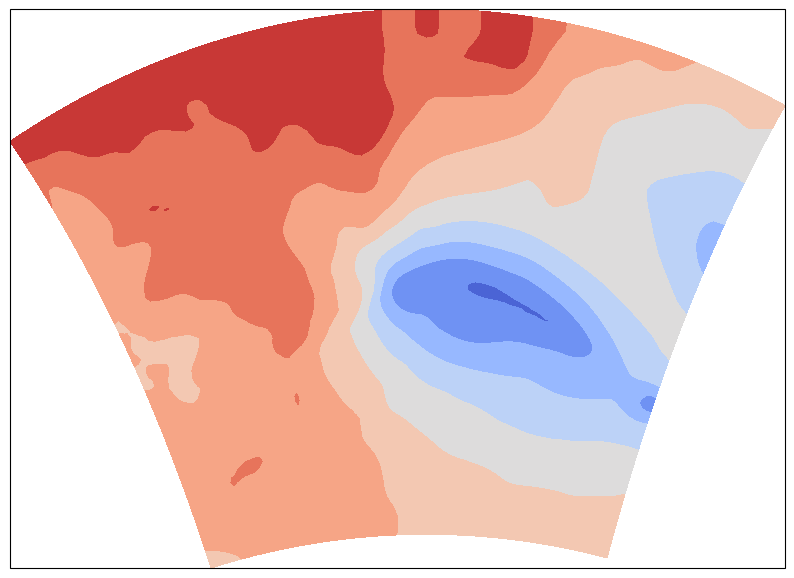

In [66]:
# Set up a figure with a specific size for the plot
fig = plt.figure(figsize=(10, 8))

# Define the map projection as Mercator, with a central longitude of 180 degrees
projection = ccrs.Mercator(central_longitude=180)

# Create an axis with the specified Mercator projection
ax = plt.axes(projection=projection)

# Plot the pressure data as a filled contour plot with the specified color map and transformation
ax.contourf(lon_grid, lat_grid, pressure_data, cmap="coolwarm", transform=ccrs.PlateCarree())


# Change projection
### 日本を中心としたランバート正角円錐図法で気圧データをプロットする

ランバート正角円錐図法を使用して日本を中心に気圧データを地図上にプロットします。

- **`projection = ccrs.LambertConformal(central_longitude=143, central_latitude=35, standard_parallels=(30, 60))`**：ランバート正角円錐図法の投影を、日本の経度143度と緯度35度に中心を設定して定義します。標準緯線は30度と60度に設定されており、これにより日本周辺での歪みが最小化されます。

- **`ax.contourf()`**：`cmap="coolwarm"` を指定して塗りつぶし等高線プロットを作成します。

---
### 日本を中心としたランバート正角円錐図法で気圧データをプロットする / Plotting Pressure Data with Lambert Conformal Conic Projection Centered on Japan

Plot pressure data on a map using the Lambert Conformal Conic projection, centered on Japan. This projection is configured to minimize distortion in mid-latitude regions.

- **`projection = ccrs.LambertConformal(central_longitude=143, central_latitude=35, standard_parallels=(30, 60))`**: Defines the Lambert Conformal Conic projection with a central longitude of 143° and latitude of 35° to center it on Japan. The standard parallels at 30° and 60° reduce distortion across Japan and nearby regions.

- **`ax.contourf()`**: Creates a filled contour plot with `cmap="coolwarm"` to represent the data distribution in color. 


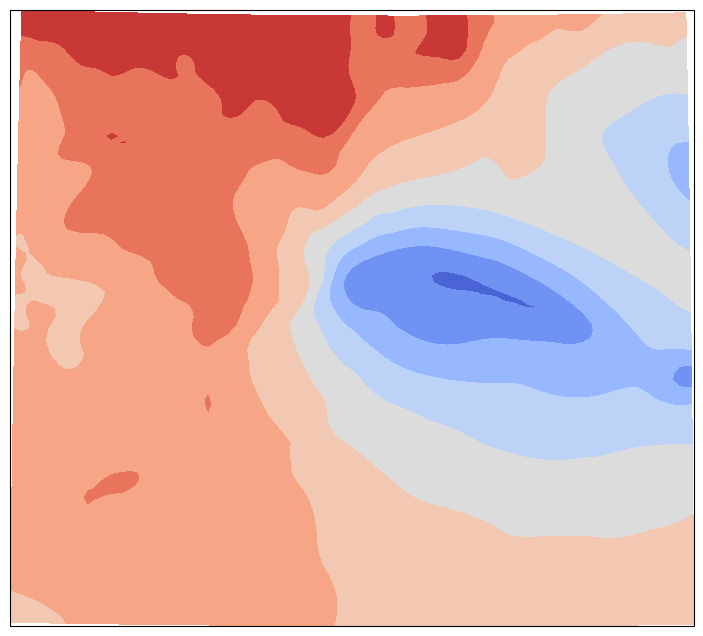

In [67]:
# Set up the Lambert Conformal Conic projection centered on Japan
fig = plt.figure(figsize=(10, 8))

# Define the Lambert Conformal Conic projection with central longitude and latitude centered on Japan
projection = ccrs.LambertConformal(central_longitude=143, central_latitude=35, standard_parallels=(30, 60))

# Create an axis with the specified Lambert Conformal Conic projection
ax = plt.axes(projection=projection)

# Plot the pressure data as a filled contour plot with the specified color map and transformation
ax.contourf(lon_grid, lat_grid, pressure_data, cmap="coolwarm", transform=ccrs.PlateCarree())


# Detailed color level setting and adding color bar

### 塗りつぶし等高線でプロットし、カラーバーを追加する

特定の等高線レベルとカラーバーを使用して気圧データをプロットします。

- **`levels = np.arange(900, 1050, 2)`**：気圧の等高線レベルを900〜1050 hPaの範囲で2 hPa刻みに定義します。
- **`ax.contourf()`**：指定された等高線レベルとカラーマップ`cmap="coolwarm"`を使用して、塗りつぶし等高線プロットを作成します。`transform=ccrs.PlateCarree()`を使用して、経度と緯度が適切にマッピングされるように調整します。
- **`ax.contour()`**：黒い等高線を追加し、詳細を強調します。`linewidths=0.5`で線の太さを制御します。
- **`ax.clabel()`**：ラベルの重複を避けるため、等高線の一部にラベルを付け、気圧データの視認性を高めます。
- **`plt.colorbar()`**：水平方向に配置されたカラーバーを追加し、プロットの気圧データの範囲と分布を示します。`cbar.set_label()`は、カラーバーに「Surface Air Pressure (hPa)」というラベルを追加します。

---

### Plotting Pressure Data with Contours and Adding a Color Bar

This code visualizes pressure data using a Cartopy projection with specific contour levels and a color bar for added clarity.

- **`levels = np.arange(900, 1050, 2)`**: Defines contour levels for pressure in the range of 900–1050 hPa with 2 hPa intervals.
- **`ax.contourf()`**: Creates a filled contour plot using the specified contour levels and color map (`cmap="coolwarm"`). The `transform=ccrs.PlateCarree()` argument ensures correct mapping of longitude and latitude values.
- **`ax.contour()`**: Adds black contour lines for additional detail, with `linewidths=0.5` for line thickness.
- **`ax.clabel()`**: Labels every other contour line to reduce clutter, improving the visibility of pressure data.
- **`plt.colorbar()`**: Adds a horizontal color bar showing the range and distribution of pressure data across the plot, with the label "Surface Air Pressure (hPa)" for clarity.



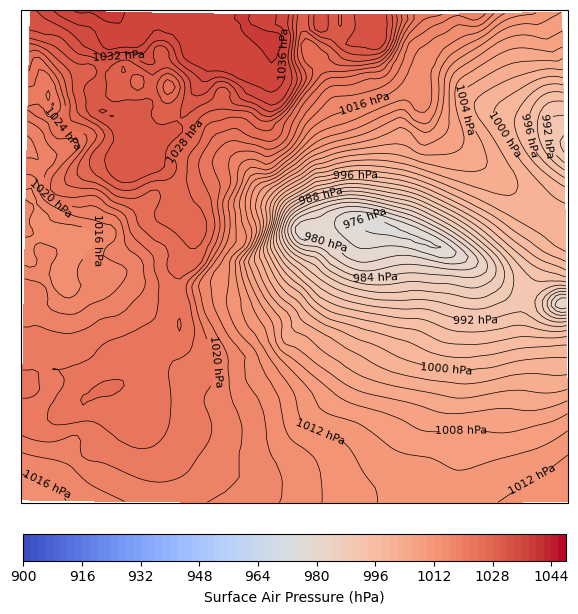

In [68]:
# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=projection)
# Define contour levels for the pressure distribution
levels = np.arange(900, 1050, 2)  # Pressure levels in hPa
contourf = ax.contourf(lon_grid, lat_grid, pressure_data, levels=levels,cmap="coolwarm", 
            transform=ccrs.PlateCarree())

# Add contour lines
contour = ax.contour(lon_grid, lat_grid, pressure_data, levels=levels, colors="black", linewidths=0.5, transform=ccrs.PlateCarree())

# Label contour lines
ax.clabel(contour, contour.levels[::2], inline=True, fontsize=8, fmt='%1.0f hPa')

# Add a color bar for the filled contour
cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.05, shrink=0.7)
cbar.set_label("Surface Air Pressure (hPa)")

### 地理的特徴の追加 

地理的な要素を加えています。

---
### Detailed Geographic Features

Adding extra geographic features for reference.

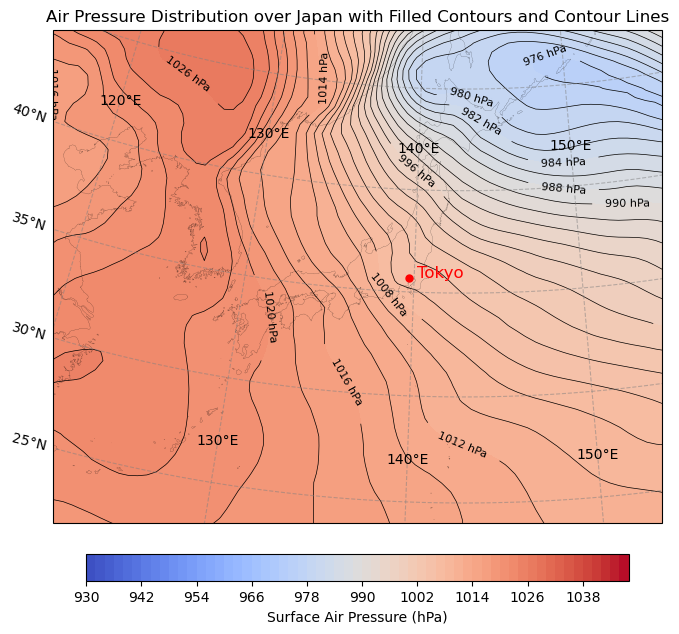

In [69]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=projection)
levels = np.arange(930, 1050, 2)  # Pressure levels in hPa
contourf = ax.contourf(lon_grid, lat_grid, pressure_data, levels=levels, cmap="coolwarm", 
                       transform=ccrs.PlateCarree())
# Add contour lines
contour = ax.contour(lon_grid, lat_grid, pressure_data, levels=levels, colors="black", linewidths=0.5, transform=ccrs.PlateCarree())
# Label contour lines
ax.clabel(contour, contour.levels, inline=True, fontsize=8, fmt='%1.0f hPa')
# Add a color bar for the filled contour
cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.05, shrink=0.7)
cbar.set_label("Surface Air Pressure (hPa)")

#=====
# Add coastlines and other geographic features for reference
ax.coastlines(resolution='10m', lw=.1)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='none')

# Add gridlines and only show longitude labels
gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5)
gl.top_labels = True  # Turn off top labels
gl.bottom_labels = True  # Show bottom labels (longitude)
gl.left_labels = True  # Turn off left labels (latitude)
gl.right_labels = False # Turn off right labels
gl.xlabel_style = {'size': 10, 'color': 'black'}

# Set extent to cover Japan [longitude_min, longitude_max, latitude_min, latitude_max]
ax.set_extent([122, 153, 24, 46], crs=ccrs.PlateCarree())

# Add title for the plot
plt.title("Air Pressure Distribution over Japan with Filled Contours and Contour Lines")

# Coordinates for Tokyo
tokyo_lon, tokyo_lat = 139.6917, 35.6895
# Mark Tokyo with a red dot and label
ax.plot(tokyo_lon, tokyo_lat, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
ax.text(tokyo_lon + 0.5, tokyo_lat, 'Tokyo', transform=ccrs.PlateCarree(), fontsize=12, color='red')

plt.savefig('airpressure.png', dpi=100)
